# Part (b) – Hierarchical Clustering (Agglomerative)

Steps:
1. Load a dataset (default: Mall Customers).
2. Standardize features.
3. Plot a dendrogram for a sample.
4. Fit AgglomerativeClustering.
5. Compute silhouette score and visualize clusters.


Assignment Done by :- Dev Mulchandani

In [2]:
# @title Load dataset (upload / URL / Kaggle)
import pandas as pd
import zipfile
from pathlib import Path

try:
    from google.colab import files  # type: ignore
    IN_COLAB = True
except Exception:
    IN_COLAB = False

DEFAULT_URL = "https://raw.githubusercontent.com/sharmaroshan/Mall-Customers-Dataset/master/Mall_Customers.csv"  # You can change this to another CSV URL

print("How do you want to load the dataset?")
print("1 = upload CSV file manually")
print("2 = download from URL (uses DEFAULT_URL above)")
print("3 = download from Kaggle (you must provide kaggle.json & dataset name)")
choice = input("Enter 1, 2, or 3: ").strip()

if choice == "1":
    if not IN_COLAB:
        raise RuntimeError("Manual upload only works in Google Colab.")
    uploaded = files.upload()
    fname = list(uploaded.keys())[0]
    df = pd.read_csv(fname)
    print("Loaded:", fname, "shape:", df.shape)
elif choice == "2":
    if not DEFAULT_URL:
        raise ValueError("DEFAULT_URL is empty. Please set it to a valid CSV URL or choose another option.")
    df = pd.read_csv(DEFAULT_URL)
    print("Loaded from URL. Shape:", df.shape)
elif choice == "3":
    import os, subprocess

    if IN_COLAB:
        from google.colab import files  # type: ignore
        print("Please upload your kaggle.json file (from your Kaggle account).")
        uploaded = files.upload()
        kaggle_path = Path("~/.kaggle").expanduser()
        kaggle_path.mkdir(parents=True, exist_ok=True)
        for fn in uploaded:
            Path(fn).replace(kaggle_path / "kaggle.json")
        os.chmod(kaggle_path / "kaggle.json", 0o600)

    # Install kaggle CLI
    import sys
    !pip -q install kaggle

    DATASET_SLUG = input("Enter Kaggle dataset slug (e.g. 'uciml/iris'): ").strip()

    # Download entire dataset (may contain multiple files)
    !kaggle datasets download -d $DATASET_SLUG -p kaggle_data

    # Unzip everything
    kaggle_dir = Path("kaggle_data")
    kaggle_dir.mkdir(exist_ok=True)
    for zpath in kaggle_dir.glob("*.zip"):
        with zipfile.ZipFile(zpath, "r") as zf:
            zf.extractall(kaggle_dir)

    csv_files = list(kaggle_dir.rglob("*.csv"))
    if not csv_files:
        raise FileNotFoundError("No CSV files found in Kaggle dataset; please inspect kaggle_data/ manually.")
    csv_path = csv_files[0]
    print("Using CSV:", csv_path)
    df = pd.read_csv(csv_path)
    print("Loaded from Kaggle. Shape:", df.shape)
else:
    raise ValueError("Invalid choice. Please run this cell again.")

df.head()


How do you want to load the dataset?
1 = upload CSV file manually
2 = download from URL (uses DEFAULT_URL above)
3 = download from Kaggle (you must provide kaggle.json & dataset name)
Enter 1, 2, or 3: 1


Saving Mall_Customers.csv to Mall_Customers.csv
Loaded: Mall_Customers.csv shape: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,18,11,2
1,2,Female,19,12,3
2,3,Male,20,13,4
3,4,Female,21,14,5
4,5,Male,22,15,6


In [3]:
# @title Preprocess data
import numpy as np
from sklearn.preprocessing import StandardScaler

X = df.select_dtypes(include=["float64", "int64"]).values
print("Feature matrix shape:", X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Feature matrix shape: (200, 4)


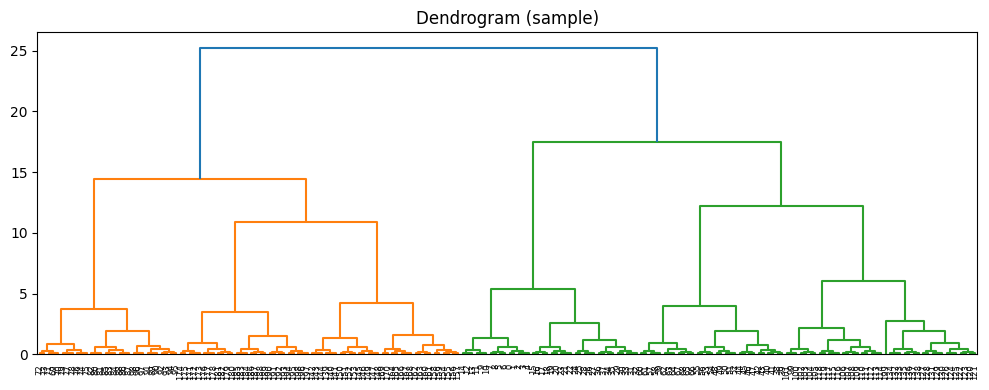

In [7]:
# Agglomerative clustering & dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

sample_size = min(200, len(X_scaled))
Z = linkage(X_scaled[:sample_size], method="ward")

plt.figure(figsize=(10,4))
dendrogram(Z, leaf_rotation=90, leaf_font_size=6)
plt.title("Dendrogram (sample)")
plt.tight_layout()
plt.show()

# NEW sklearn parameters (affinity removed)
n_clusters = 4
hc = AgglomerativeClustering(n_clusters=n_clusters, metric="euclidean", linkage="ward")
labels = hc.fit_predict(X_scaled)   # <-- now this works



Silhouette score: 0.489


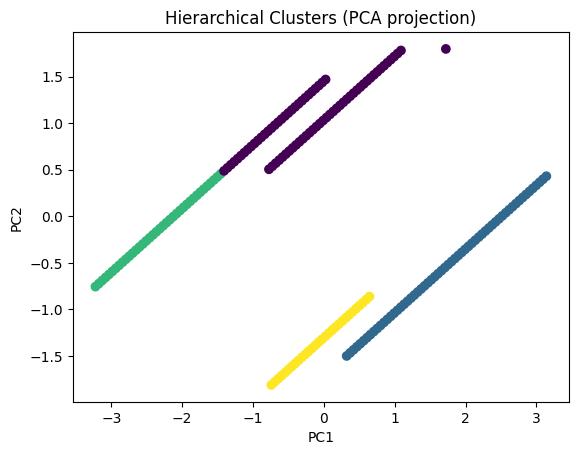

In [8]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

score = silhouette_score(X_scaled, labels)
print(f"Silhouette score: {score:.3f}")

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels)
plt.title("Hierarchical Clusters (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
